## Importing the dependencies

In [1]:
import pandas as pd, numpy as np, opendatasets as od, os, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings                     
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

## Loading Data

In [2]:
dataset = 'kaggle.com/datasets/saivamshi/cricket-world-cup-2019-players-data?select=Bowler_data.csv'

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\cricket-world-cup-2019-players-data" (use force=True to force download)


In [4]:
data_dir = '.\cricket-world-cup-2019-players-data'

In [5]:
os.listdir(data_dir)

['.ipynb_checkpoints']

## Data Preprocessing

In [6]:
Batsman = pd.read_csv('Batsman_Data.csv')
Bowler = pd.read_csv('Bowler_data.csv')
Ground = pd.read_csv('Ground_Averages.csv')
Match_Results = pd.read_csv('ODI_Match_Results.csv')
Match_Totals = pd.read_csv('ODI_Match_Totals.csv')
WC_players = pd.read_csv('WC_players.csv')

In [7]:
dataset = [Batsman,Bowler,Ground,Match_Results,Match_Totals,WC_players]

In [8]:
# dataframe of the dataset
def DataFrame(dataset):
    for data in dataset:
        print(data.head())
        print('----------------------------------------------------------------------------')

In [9]:
DataFrame(dataset)

   Unnamed: 0  Bat1  Runs  BF  SR  4s  6s  Opposition  Ground  Start Date  \
0           1   319     0   0   0   0   0           9      92         492   
1           2   319     0   0   0   0   0           9      78         864   
2           3   319     0   0   0   0   0           9      37        1030   
3           4   319     0   0   0   0   0           4      38        1327   
4           5   319     0   0   0   0   0           9      38        1374   

   Match_ID  Batsman  Player_ID  
0       759      113      49619  
1       761      113      49619  
2       762      113      49619  
3       763      113      49619  
4       764      113      49619  
----------------------------------------------------------------------------
   Unnamed: 0  Overs  Mdns  Runs  Wkts  Econ  Ave  SR  Opposition  Ground  \
0           1     49     1    59     1   412    0   0           9      92   
1           2     12     1    57     3   316  103  77           9      78   
2           3      0     

In [10]:
# checking for the missing values
def missing_values(dataset):
    for data in dataset:
        missing = data.isnull().sum()
        print(missing)
        print('---------------------------------------------------------------------')

In [11]:
missing_values(dataset)

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64
---------------------------------------------------------------------
Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64
---------------------------------------------------------------------
Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64
---------------------------------------------------------------------
Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country

In [12]:
# number of rows and columns
def shape_data(dataset):
    for data in dataset:
        shape = data.shape
        print(shape)
        print('---------------------------------------------------------------------')   

In [13]:
shape_data(dataset)

(11149, 13)
---------------------------------------------------------------------
(11118, 14)
---------------------------------------------------------------------
(106, 11)
---------------------------------------------------------------------
(1322, 12)
---------------------------------------------------------------------
(1296, 13)
---------------------------------------------------------------------
(152, 3)
---------------------------------------------------------------------


In [14]:
# information about the data
def information(dataset):
    for data in dataset:
        info = data.info()
        print(info)
        print('---------------------------------------------------------------------')

In [15]:
information(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  11149 non-null  int64
 1   Bat1        11149 non-null  int64
 2   Runs        11149 non-null  int64
 3   BF          11149 non-null  int64
 4   SR          11149 non-null  int64
 5   4s          11149 non-null  int64
 6   6s          11149 non-null  int64
 7   Opposition  11149 non-null  int64
 8   Ground      11149 non-null  int64
 9   Start Date  11149 non-null  int64
 10  Match_ID    11149 non-null  int64
 11  Batsman     11149 non-null  int64
 12  Player_ID   11149 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB
None
---------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   

## Label Encoding

In [16]:
categorical_data = ['object']
    
def categ_data(df):
        cat_col = []
        features = df.columns.values.tolist()
        for col in features:
            if df[col].dtype in categorical_data:
                cat_col.append(col)
        return cat_col   

def label_encod_categ(df,cat_col):
    label = LabelEncoder()
    
    for col in cat_col:
        encoded_values = label.fit_transform(df[col])
        df[col] = encoded_values   
        
for data in dataset:
    cat_col = categ_data(data)  
    label_encod_categ(data, cat_col)  
    
def information(dataset):
    for data in dataset:
        info = data.info()
        print(info)
        print('---------------------------------------------------------------------')

In [17]:
information(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  11149 non-null  int64
 1   Bat1        11149 non-null  int64
 2   Runs        11149 non-null  int64
 3   BF          11149 non-null  int64
 4   SR          11149 non-null  int64
 5   4s          11149 non-null  int64
 6   6s          11149 non-null  int64
 7   Opposition  11149 non-null  int64
 8   Ground      11149 non-null  int64
 9   Start Date  11149 non-null  int64
 10  Match_ID    11149 non-null  int64
 11  Batsman     11149 non-null  int64
 12  Player_ID   11149 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB
None
---------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   

In [18]:
# imputing missing values in datasets
imputer = IterativeImputer()
missing_data = ['ODI_Match_Results.csv','ODI_Match_Totals.csv']

for data in missing_data:
    df_missing_data = pd.read_csv(data)
    df_imputed = imputer.fit_transform(df_missing_data)
    df_imputed = pd.DataFrame(df_imputed, columns=df_missing_data.columns)
    print("DataFrame after imputation for:", data)
    print(df_imputed.isnull().sum())
    print("---------------------------------------------------------")

DataFrame after imputation for: ODI_Match_Results.csv
Unnamed: 0    0
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Country       0
Country_ID    0
dtype: int64
---------------------------------------------------------
DataFrame after imputation for: ODI_Match_Totals.csv
Unnamed: 0    0
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Country       0
Country_ID    0
dtype: int64
---------------------------------------------------------


## Date: 
* Month 
* Day 
* Year

In [19]:
data_time = ['Batsman','Bowler','Match_Results','Match_Totals']
data_frames = {
    'Batsman': Batsman,
    'Bowler': Bowler,
    'Match_Results': Match_Results,
    'Match_Totals': Match_Totals
}

for data_name, data in data_frames.items():
    data['Start Date'] = pd.to_datetime(data['Start Date'], origin='unix', unit='D')

    data['Year'] = data['Start Date'].dt.year
    data['Month'] = data['Start Date'].dt.month
    data['Day'] = data['Start Date'].dt.day

## Merging Datas

In [20]:
common_col_bats_bowl = ['Unnamed: 0','Opposition','Ground','Month','Year','Day','Match_ID','Player_ID']

In [21]:
merged_df1 = pd.merge(Batsman,Bowler, on = common_col_bats_bowl,how='inner')
merged_df1.head()

,Unnamed: 0,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Start Date_x,...,Day,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Start Date_y,Bowler
0,1,319,0,0,0,0,0,9,92,1971-05-08,...,8,49,1,59,1,412,0,0,1971-05-08,138
1,6,1,1,141,1,1,1,9,38,1970-03-13,...,13,12,1,79,1,431,0,0,1970-03-13,138
2,8,319,0,0,0,0,0,7,81,1970-01-28,...,28,48,1,44,4,315,41,38,1970-01-28,138
3,11,1,1,75,1,1,1,3,102,1970-02-25,...,25,31,1,39,1,444,0,0,1970-02-25,138
4,12,0,1,75,1,1,1,15,40,1970-05-22,...,22,25,1,14,3,206,223,17,1970-05-22,138


In [22]:
merged_df1.shape

(1112, 25)

In [23]:
common_col_result_total = ['Opposition','Ground','Country','Country_ID','Year','Month']

In [24]:
merged_df2 = pd.merge(Match_Results,Match_Totals, on = common_col_result_total,how='inner')

In [25]:
merged_df2.head()

,Unnamed: 0_x,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Start Date_x,Match_ID_x,...,Unnamed: 0_y,Score,Overs,RPO,Target,Inns,Result_y,Start Date_y,Match_ID_y,Day_y
0,418,6,160,NaN,1,1,5,57,1971-04-26,0,...,412,404,48.3,165,NaN,1,4,1971-04-15,0,15
1,692,3,160,NaN,2,2,11,57,1971-04-26,0,...,680,115,48.0,25,251.0,2,1,1971-04-15,0,15
2,419,3,3,NaN,1,2,5,29,1971-07-24,1,...,413,93,48.5,18,168.0,2,1,1971-07-13,1,13
3,693,6,3,NaN,2,1,11,29,1971-07-24,1,...,681,120,43.4,48,NaN,1,4,1971-07-13,1,13
4,121,3,10,NaN,1,2,1,63,1970-02-15,2,...,117,199,40.0,146,306.0,2,1,1970-02-14,2,14


In [26]:
merged_df2.shape

(1036, 25)

In [27]:
comm_col_merged_df1_ground = ['Ground']

In [28]:
merge_df3 = pd.merge(merged_df1,Ground , on = comm_col_merged_df1_ground , how = 'inner')
merge_df3.head()

,Unnamed: 0,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Start Date_x,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,1,319,0,0,0,0,0,9,92,1971-05-08,...,6,16,14,0,2,6890,202,7508,34.1,5.5
1,1750,184,111,81,572,20,1,9,92,1971-05-08,...,6,16,14,0,2,6890,202,7508,34.1,5.5
2,2271,319,0,0,0,0,0,9,92,1970-07-13,...,6,16,14,0,2,6890,202,7508,34.1,5.5
3,2481,151,94,76,263,13,2,9,92,1970-07-13,...,6,16,14,0,2,6890,202,7508,34.1,5.5
4,2793,237,138,133,1645,21,1,9,92,1970-07-13,...,6,16,14,0,2,6890,202,7508,34.1,5.5


In [29]:
merge_df3.shape

(927, 35)

In [30]:
comm_col_merg_df2_df3 = ['Ground','Month','Year']

In [31]:
Cricket_World_Cup = pd.merge(merged_df2,merge_df3, on = comm_col_merg_df2_df3, how = 'inner')
Cricket_World_Cup.head()

,Unnamed: 0_x,Result_x,Margin,BR,Toss,Bat,Opposition_x,Ground,Start Date_x_x,Match_ID_x,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO_y
0,697,6,120,15.0,2,2,3,64,1970-11-20,12,...,5,10,10,0,0,4317,154,5477,28.03,4.72
1,697,6,120,15.0,2,2,3,64,1970-11-20,12,...,5,10,10,0,0,4317,154,5477,28.03,4.72
2,697,6,120,15.0,2,2,3,64,1970-11-20,12,...,5,10,10,0,0,4317,154,5477,28.03,4.72
3,697,6,120,15.0,2,2,3,64,1970-11-20,12,...,5,10,10,0,0,4317,154,5477,28.03,4.72
4,697,6,120,15.0,2,2,3,64,1970-11-20,12,...,5,10,10,0,0,4317,154,5477,28.03,4.72


In [32]:
Cricket_World_Cup.shape

(516, 57)

## Player Performance Score 

In [33]:
# Calculate Batting Average for each player
Cricket_World_Cup['Batting Average'] = Cricket_World_Cup['Bat1'] / Cricket_World_Cup['Inns']

In [34]:
# Calculate Bowling Average for each player
Cricket_World_Cup['Bowling Average'] = Cricket_World_Cup['Runs_y'] / Cricket_World_Cup['Wkts_y']

In [35]:
# Filter out rows with zero or missing values in 'BF'
Cricket_World_Cup = Cricket_World_Cup[Cricket_World_Cup['BF'] > 0]

In [36]:
# Calculate Strike Rate (Batting) for each player
Cricket_World_Cup['Strike Rate (Batting)'] = (Cricket_World_Cup['Bat1'] / Cricket_World_Cup['BF']) * 100

In [37]:
# Calculate Economy Rate (Bowling) for each player
Cricket_World_Cup['Economy Rate (Bowling)'] = (Cricket_World_Cup['Runs_y'] / Cricket_World_Cup['Overs_y'])

In [38]:
# Calculate the total Maiden Overs for each player
Cricket_World_Cup['Maiden Overs Total'] = Cricket_World_Cup['Mdns'].sum()

In [39]:
# Step 1: Choose relevant performance metrics
batting_average = Cricket_World_Cup['Batting Average']
bowling_average = Cricket_World_Cup['Bowling Average']
strike_rate_batting = Cricket_World_Cup['Strike Rate (Batting)']
economy_rate_bowling = Cricket_World_Cup['Economy Rate (Bowling)']
maiden_overs = Cricket_World_Cup['Maiden Overs Total']

#Step 2: Normalize the selected performance metrics
# You can use Min-Max Scaling or Z-score normalization
def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN

# Step 3: Assign weights to each performance metric
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25


# Step 4: Calculate the composite performance score for each player
Cricket_World_Cup['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )

In [40]:
Cricket_World_Cup.shape

(410, 63)

In [41]:
# Removing unrelevant data
Cricket_World_Cup.columns

Index(['Unnamed: 0_x', 'Result_x', 'Margin', 'BR', 'Toss', 'Bat',
       'Opposition_x', 'Ground', 'Start Date_x_x', 'Match_ID_x', 'Country',
       'Country_ID', 'Year', 'Month', 'Day_x', 'Unnamed: 0_y', 'Score',
       'Overs_x', 'RPO_x', 'Target', 'Inns', 'Result_y', 'Start Date_y_x',
       'Match_ID_y', 'Day_y', 'Unnamed: 0', 'Bat1', 'Runs_x', 'BF', 'SR_x',
       '4s', '6s', 'Opposition_y', 'Start Date_x_y', 'Match_ID', 'Batsman',
       'Player_ID', 'Day', 'Overs_y', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ',
       'Ave_x', 'SR_y', 'Start Date_y_y', 'Bowler', 'Span', 'Mat', 'Won',
       'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_y',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

In [42]:
columns_to_drop = ['Unnamed: 0_x', 'Start Date_x_x', 'Unnamed: 0_y', 'Start Date_y_x', 'Unnamed: 0', 'Start Date_x_y', 'Start Date_y_y']
Cricket_World_Cup = Cricket_World_Cup.drop(columns_to_drop, axis=1)

In [43]:
Cricket_World_Cup.shape

(410, 56)

## Deviation Solution

In [44]:
Cricket_World_Cup.skew()

Result_x                   -0.155127
Margin                     -1.355034
BR                          1.214554
Toss                        0.078395
Bat                         0.236634
Opposition_x               -0.070374
Ground                      0.271873
Match_ID_x                  0.142641
Country                    -0.328997
Country_ID                  2.251281
Year                        0.603250
Month                       0.494497
Day_x                      -0.169569
Score                       0.202990
Overs_x                    -1.539350
RPO_x                      -0.096225
Target                      0.136403
Inns                       -0.001301
Result_y                    0.079290
Match_ID_y                  0.084663
Day_y                       0.414164
Bat1                       -0.217317
Runs_x                     -0.331204
BF                         -0.402715
SR_x                        0.092571
4s                          0.378713
6s                          1.977663
O

In [45]:
# Seaprate the skewed columns
Cricket_World_Cup.skew()[(Cricket_World_Cup.skew() >= 0.5) & (Cricket_World_Cup.skew() >= -0.5)]

BR                          1.214554
Country_ID                  2.251281
Year                        0.603250
6s                          1.977663
Batsman                     0.970075
Player_ID                   0.660959
Overs_y                     0.768228
Mdns                        0.765210
Runs_y                      0.839834
Wkts_x                      1.338370
Ave_x                       1.717823
SR_y                        1.415800
Bowler                      1.029236
Span                        1.655467
Mat                         3.370321
Won                         3.572379
Tied                        3.035891
NR                          2.919663
Runs                        3.158141
Wkts_y                      3.428761
Balls                       3.374245
Ave_y                       0.960211
RPO_y                       2.439194
Bowling Average             4.351404
Strike Rate (Batting)       6.691273
Economy Rate (Bowling)      3.167285
Player Performance Score    1.970036
d

In [46]:
skew_column = ['BR','Country_ID','6s','Batsman','Player_ID','Overs_y','Mdns','Runs_y','Wkts_x','Balls','Ave_y','RPO_y','Bowling Average','Strike Rate (Batting)','Economy Rate (Bowling)','Player Performance Score','Ave_x','SR_y','Bowler','Span','Mat','Won','Tied','NR','Runs','Wkts_y']

In [47]:
# Power transformation for remove the skewness 
pt = PowerTransformer()
Cricket_World_Cup[skew_column] = pt.fit_transform(Cricket_World_Cup[skew_column].values)
Cricket_World_Cup[skew_column]

,BR,Country_ID,6s,Batsman,Player_ID,Overs_y,Mdns,Runs_y,Wkts_x,Balls,...,Ave_x,SR_y,Bowler,Span,Mat,Won,Tied,NR,Runs,Wkts_y
0,-0.518561,0.028061,0.969107,0.421043,-1.187353,0.406891,1.512023,0.955432,1.342215,1.047526,...,1.569528,1.613784,0.416881,-0.640998,1.164227,1.216478,-0.300708,-0.37691,0.963584,1.080371
1,-0.518561,0.028061,-0.658515,0.813154,1.277580,0.406891,1.512023,1.048164,0.980260,1.047526,...,1.623399,1.642166,0.801459,-0.640998,1.164227,1.216478,-0.300708,-0.37691,0.963584,1.080371
2,-0.518561,0.028061,0.969107,-0.517773,-1.028107,0.406891,0.647009,1.048164,1.586882,1.047526,...,1.525960,1.586117,-0.512950,-0.640998,1.164227,1.216478,-0.300708,-0.37691,0.963584,1.080371
3,-0.518561,0.028061,-0.658515,0.493733,-1.084369,1.303999,0.647009,1.172455,0.365135,1.047526,...,-0.631297,-0.630699,0.488337,-0.640998,1.164227,1.216478,-0.300708,-0.37691,0.963584,1.080371
4,-0.518561,0.028061,-0.658515,-0.426198,0.801869,-1.085247,-1.080762,-1.097571,-1.052666,1.047526,...,-0.631297,-0.630699,-0.421665,-0.640998,1.164227,1.216478,-0.300708,-0.37691,0.963584,1.080371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,-1.204445,2.007639,-0.658515,-0.777288,-0.938770,0.406891,0.647009,0.983243,0.365135,-1.520630,...,-0.631297,-0.630699,-0.772363,1.940562,-1.629221,-1.640522,-0.300708,-0.37691,-1.718671,-1.420029
511,NaN,0.376867,-0.658515,0.977540,-0.980928,1.153396,1.512023,1.048164,0.365135,0.428142,...,-0.631297,-0.630699,0.962057,-0.188844,0.447138,0.495331,-0.300708,-0.37691,0.615932,0.243452
512,NaN,-0.199176,-0.658515,0.977540,-0.980928,1.153396,1.512023,1.048164,0.365135,0.428142,...,-0.631297,-0.630699,0.962057,-0.188844,0.447138,0.495331,-0.300708,-0.37691,0.615932,0.243452
513,0.749120,-0.199176,-0.658515,-0.777288,-0.938770,0.667832,0.647009,0.382500,0.365135,1.566961,...,-0.631297,-0.630699,-0.772363,-0.640998,1.638099,1.686072,-0.300708,-0.37691,1.638311,1.600025


In [48]:
Cricket_World_Cup.skew()

Result_x                   -0.155127
Margin                     -1.355034
BR                         -0.173321
Toss                        0.078395
Bat                         0.236634
Opposition_x               -0.070374
Ground                      0.271873
Match_ID_x                  0.142641
Country                    -0.328997
Country_ID                 -0.017954
Year                        0.603250
Month                       0.494497
Day_x                      -0.169569
Score                       0.202990
Overs_x                    -1.539350
RPO_x                      -0.096225
Target                      0.136403
Inns                       -0.001301
Result_y                    0.079290
Match_ID_y                  0.084663
Day_y                       0.414164
Bat1                       -0.217317
Runs_x                     -0.331204
BF                         -0.402715
SR_x                        0.092571
4s                          0.378713
6s                          0.995109
O

## Outliers Solution

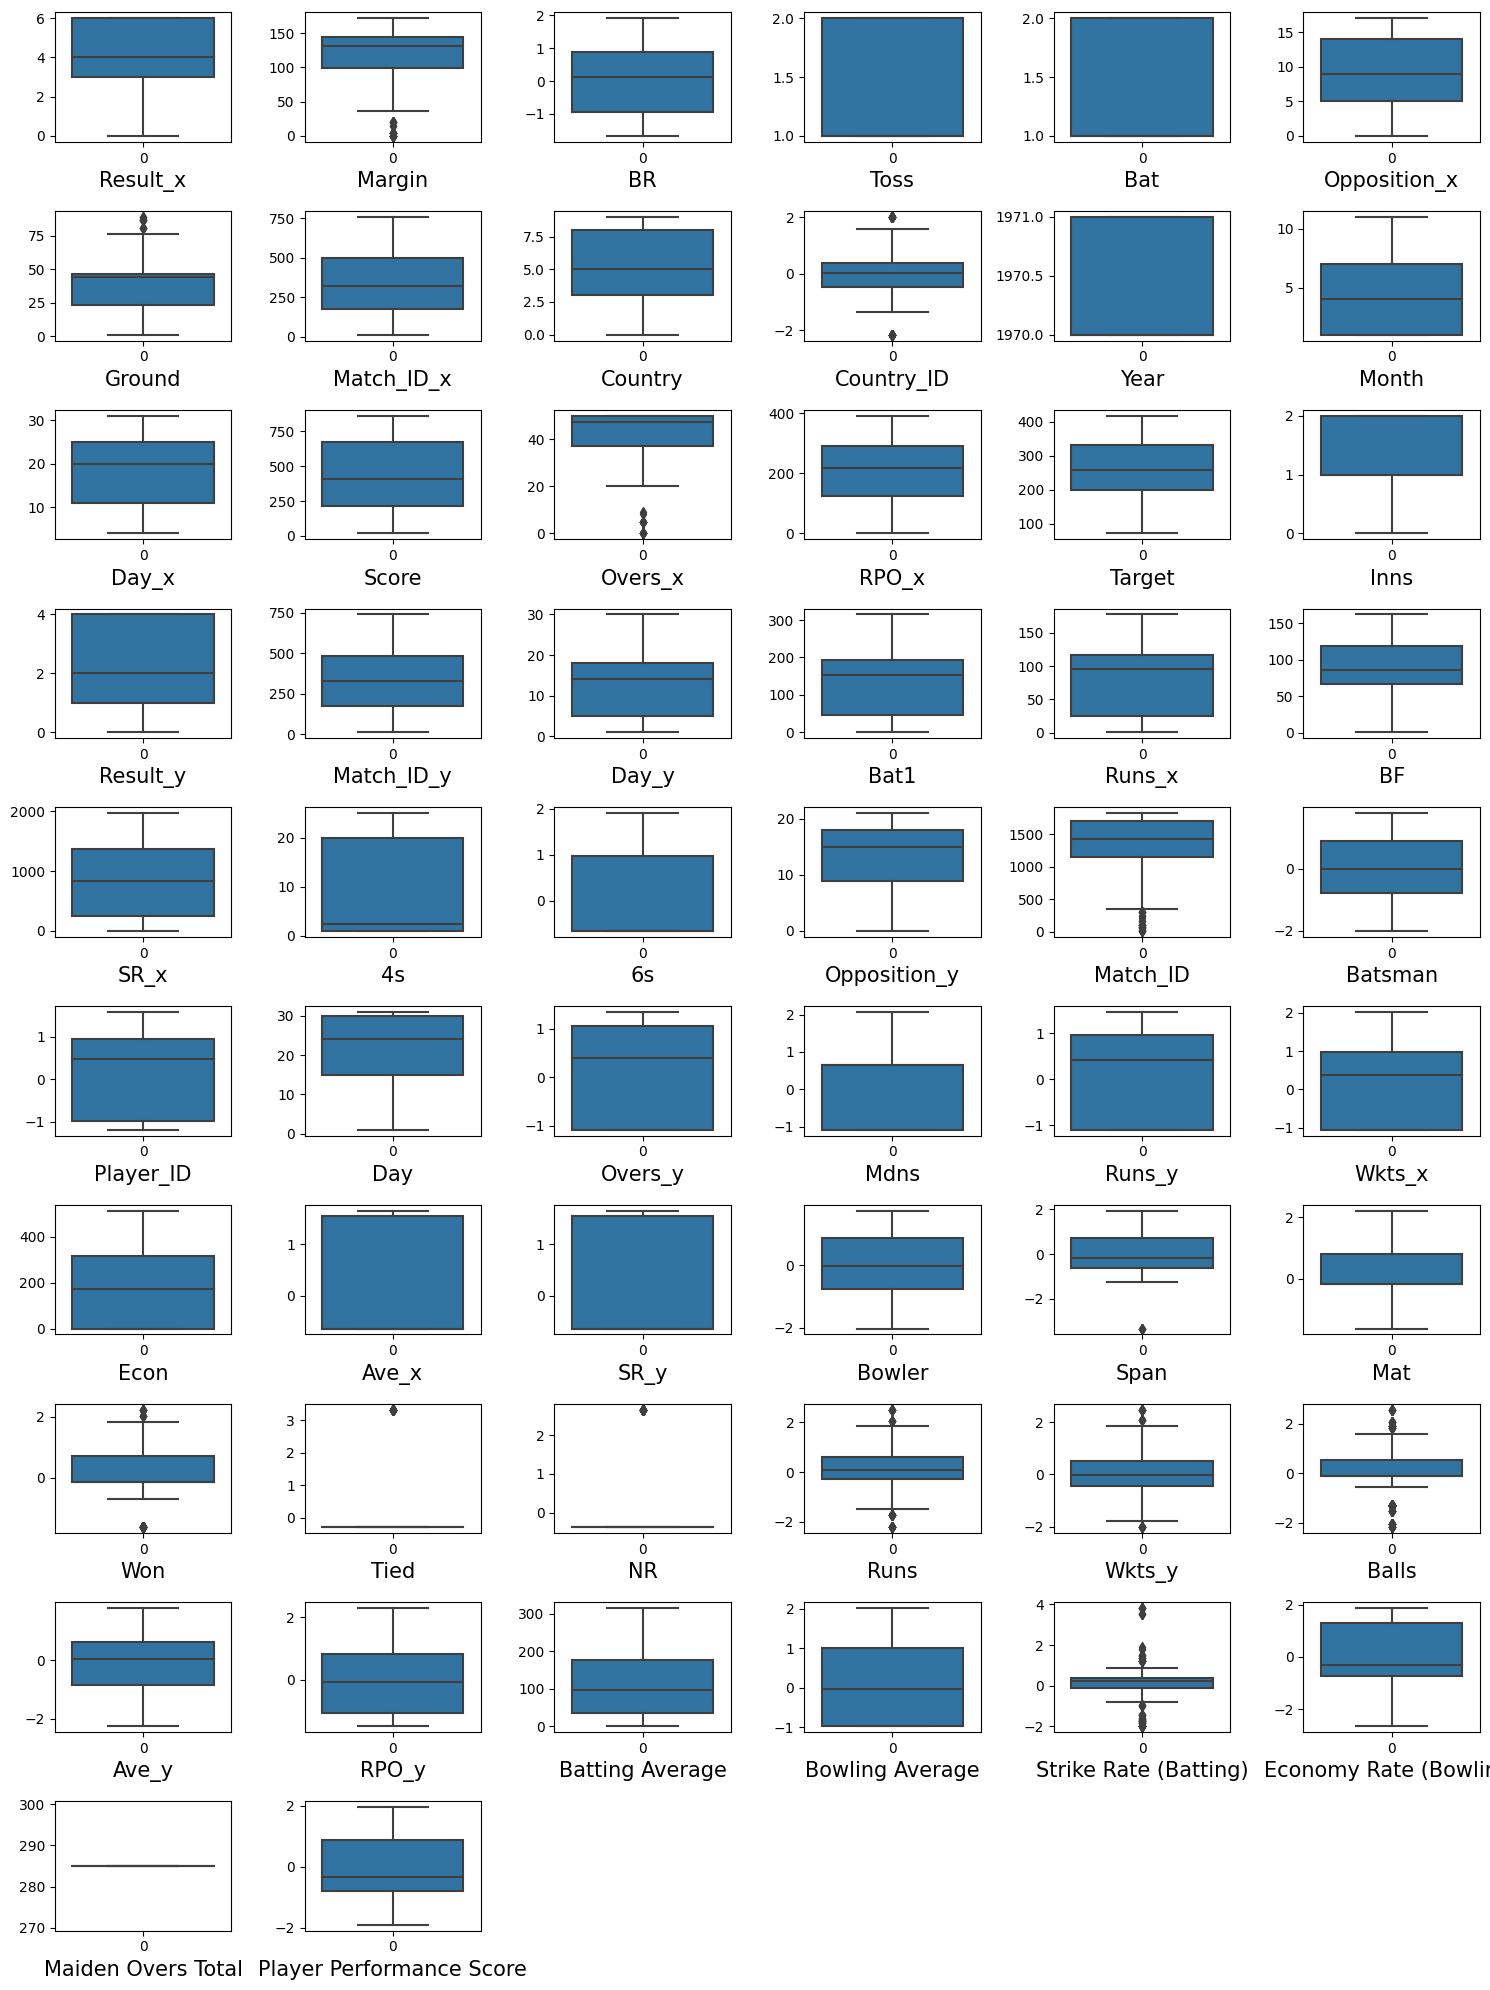

In [49]:
# check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in Cricket_World_Cup:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(Cricket_World_Cup[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [50]:
outlier_column = ['Strike Rate (Batting)','Balls','Wkts_y','Runs','NR','Tied','Won','Span','Match_ID','Overs_x','Ground','Country_ID','Margin']

In [51]:
# Remove the outliers by using Z score
z_score=zscore(Cricket_World_Cup[outlier_column])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
Cricket_World_Cup=Cricket_World_Cup[filter_entry]
Cricket_World_Cup.head()

,Result_x,Margin,BR,Toss,Bat,Opposition_x,Ground,Match_ID_x,Country,Country_ID,...,Wkts_y,Balls,Ave_y,RPO_y,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,6,120,-0.518561,2,2,3,64,12,4,0.028061,...,1.080371,1.047526,-0.261864,-0.478498,149.5,-0.027819,1.782860,1.279304,285,0.886045
1,6,120,-0.518561,2,2,3,64,12,4,0.028061,...,1.080371,1.047526,-0.261864,-0.478498,69.0,0.079757,0.230498,1.388109,285,0.557006
2,6,120,-0.518561,2,2,3,64,12,4,0.028061,...,1.080371,1.047526,-0.261864,-0.478498,33.0,0.079757,-0.131421,1.388109,285,0.512784
3,6,120,-0.518561,2,2,3,64,12,4,0.028061,...,1.080371,1.047526,-0.261864,-0.478498,90.5,0.231336,0.228029,-0.145403,285,-0.809875
4,6,120,-0.518561,2,2,3,64,12,4,0.028061,...,1.080371,1.047526,-0.261864,-0.478498,0.0,-0.969396,-1.986451,NaN,285,NaN


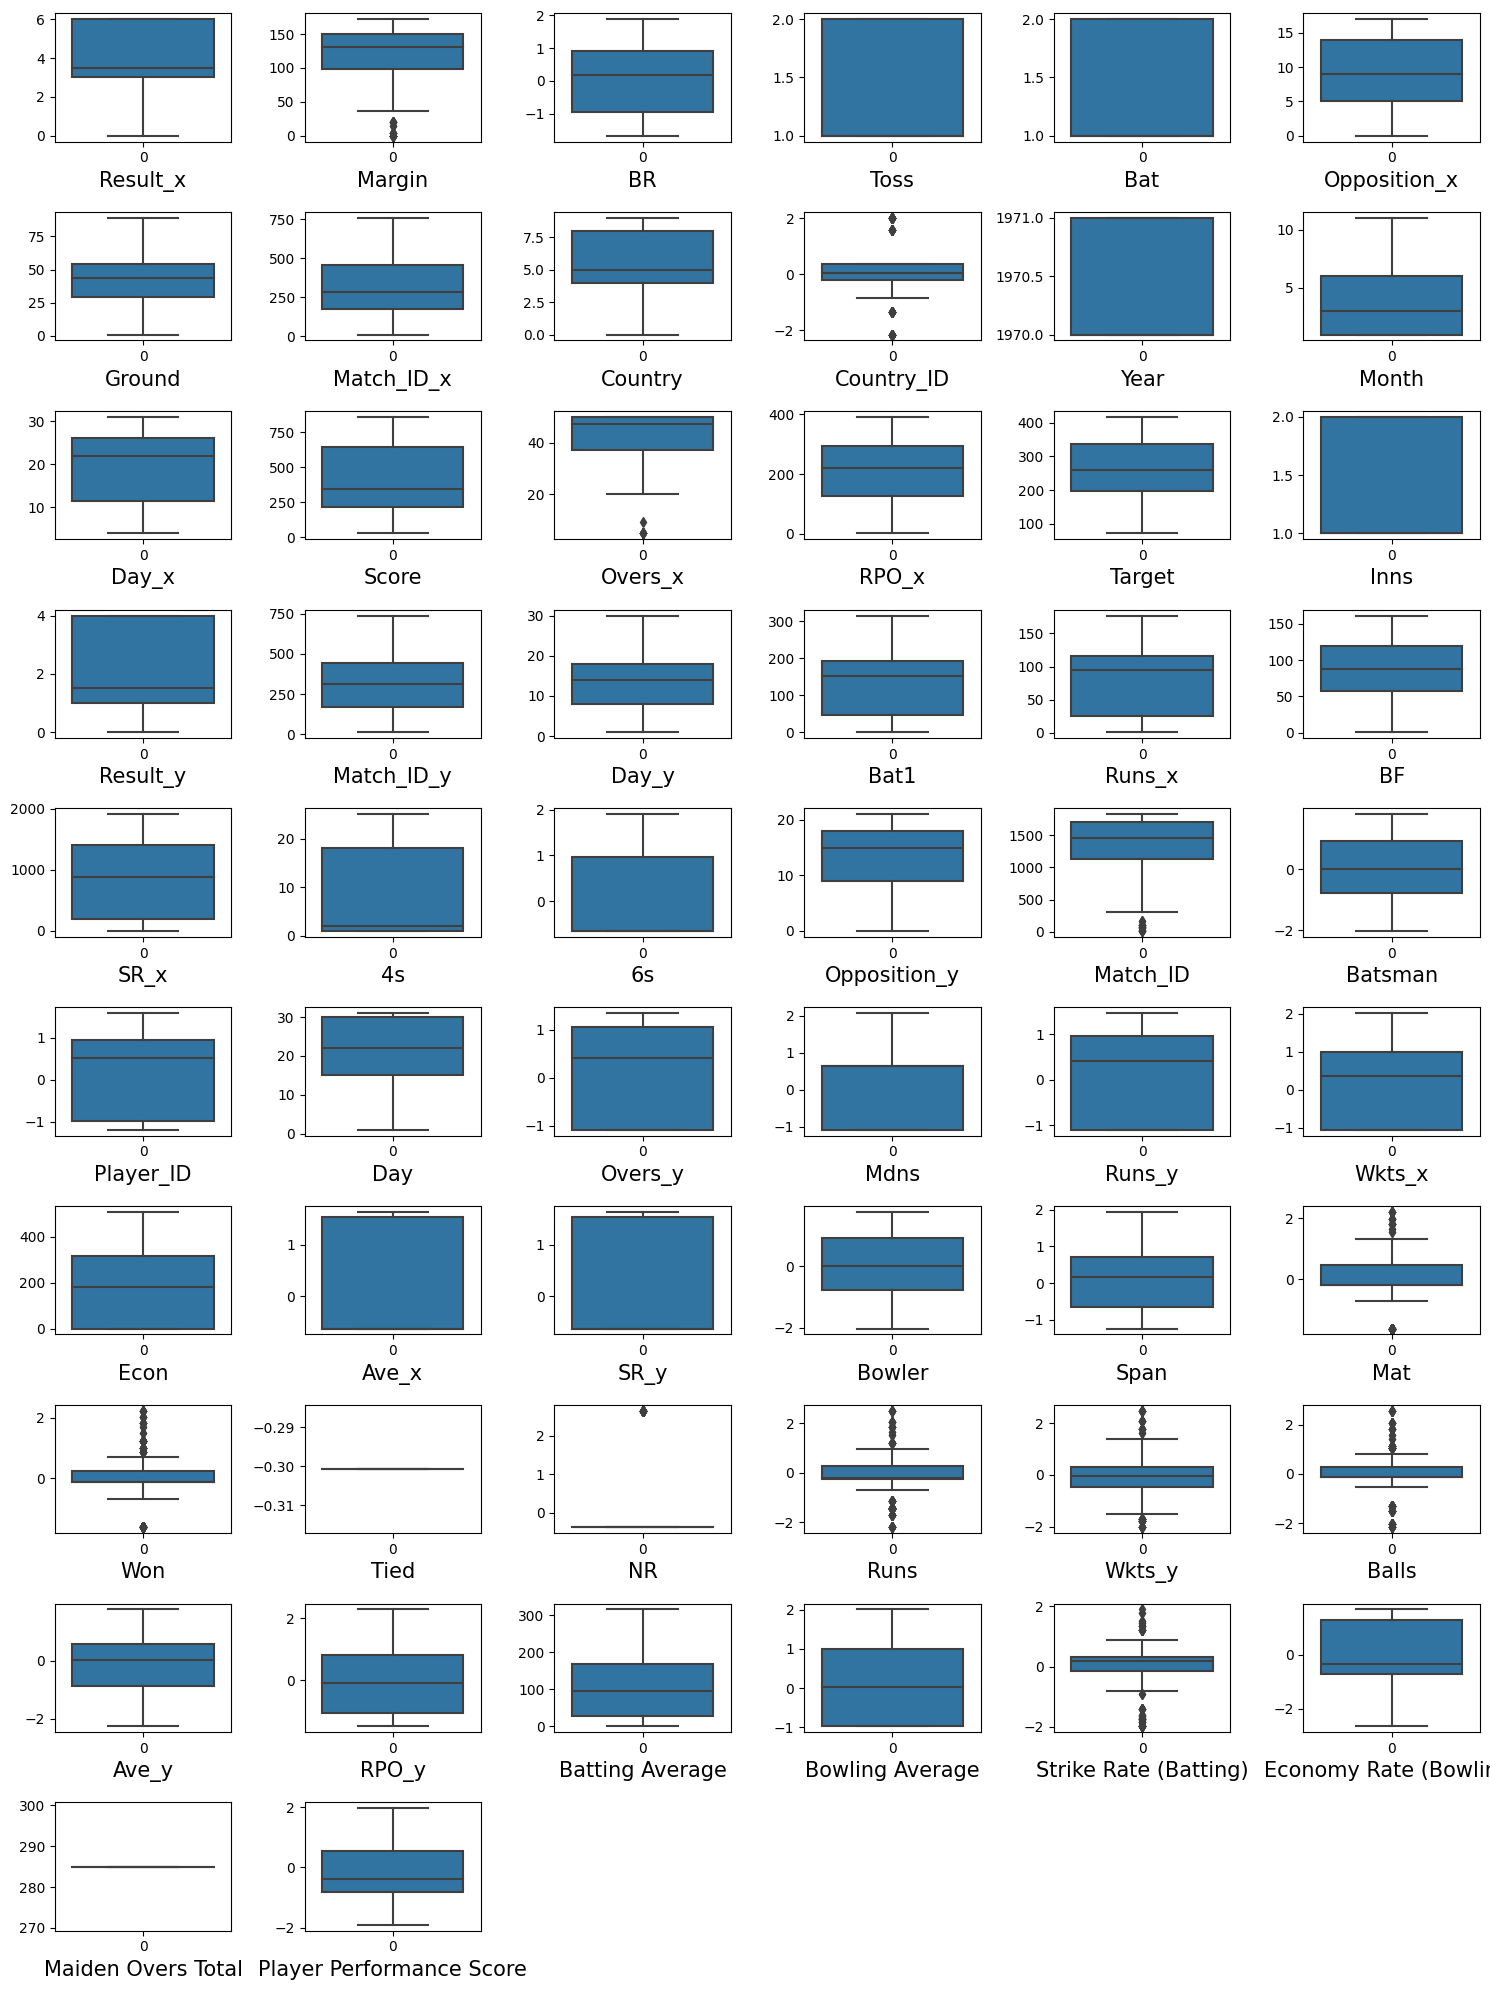

In [52]:
# recheck for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in Cricket_World_Cup:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(Cricket_World_Cup[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Treating NaN Values

In [53]:
nan_count = pd.isna(Cricket_World_Cup['Player Performance Score']).sum()
print("Number of NaN values :", nan_count)

Number of NaN values : 154


In [54]:
mean_value = Cricket_World_Cup['Player Performance Score'].mean()
Cricket_World_Cup['Player Performance Score'].fillna(mean_value, inplace=True)

In [55]:
nan_count = pd.isna(Cricket_World_Cup['Player Performance Score']).sum()
print("Number of NaN values :", nan_count)

Number of NaN values : 0


## Seprating Data

In [56]:
x = Cricket_World_Cup[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'Year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]


y = Cricket_World_Cup['Player Performance Score'] 

In [57]:
print(x.shape)

(358, 48)


In [58]:
print(y.shape)

(358,)


## Standardization

In [59]:
# data stadardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)

In [60]:
x = standardized_data

# Train Test Split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state= 2 )

## Training Model 

In [62]:
LR = LinearRegression()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

x_train_imputed = imputer.fit_transform(x_train)

In [69]:
x_test_imputed = imputer.transform(x_test)

In [70]:
LR.fit(x_train_imputed,y_train)

LinearRegression()

## Model Evaluation

In [65]:
# R2_Score
# r2_score on training  data
y_train_prediction = LR.predict(x_train_imputed)
R2_Score = r2_score(y_train, y_train_prediction)
print('R2_Score Training Data:', R2_Score)

R2_Score Training Data: 0.8983243264670178


In [72]:
# r2_score on testing data 
y_test_prediction = LR.predict(x_test_imputed)
R2_Score = r2_score(y_test, y_test_prediction)
print('R2_Score Testing Data:', R2_Score)

R2_Score Testing Data: 0.8235492917967095
